# CustomDataset

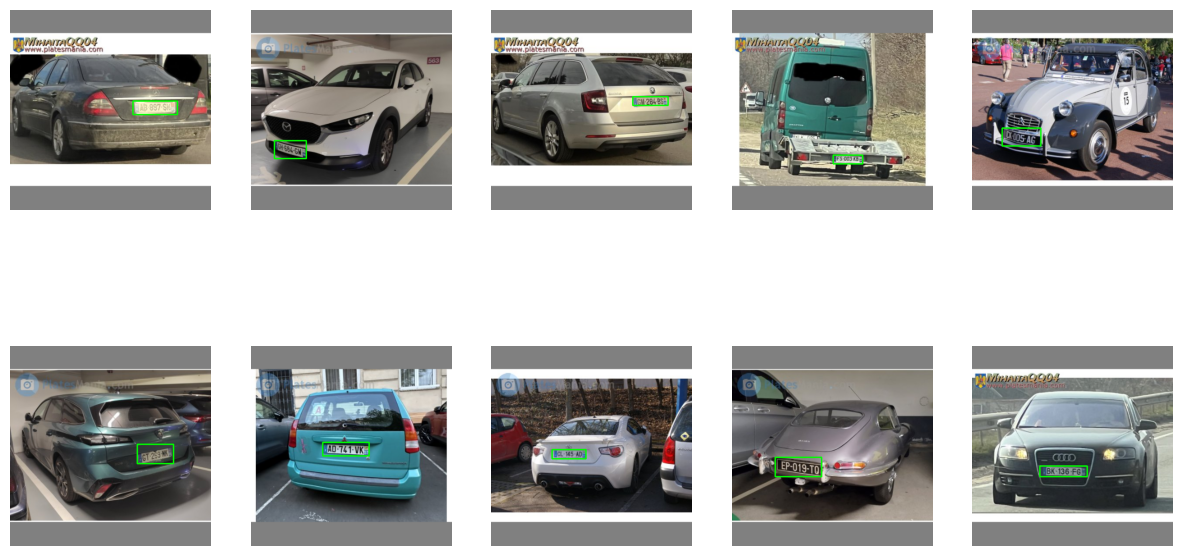

In [1]:
import cv2
import matplotlib.pyplot as plt
from customDataset import CustomDataset

# Chemin vers le dossier contenant les images et les annotations
image_folders = [
    r"..\..\data\images\cars\fr",
    # r"..\..\data\images\cars\de",
    # r"..\..\data\images\cars\pl",
]
# Création de l'instance du dataset
dataset = CustomDataset(image_folders)
# Affichage de 10 images avec leurs boîtes englobantes annotées
num_images_to_display = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for i, ith_dataset in enumerate(np.random.randint(low=0, high=len(dataset), size=num_images_to_display)):
    sample = dataset[ith_dataset]
    image = sample["original_img"]
    labels = sample["label"]
    for bbox in labels:
        # Coordonnées x_min, y_min, largeur, hauteur
        x_min = int((bbox[1] - bbox[3] / 2) * image.shape[1])
        y_min = int((bbox[2] - bbox[4] / 2) * image.shape[0])
        width = int(bbox[3] * image.shape[1])
        height = int(bbox[4] * image.shape[0])
        # Dessiner la boîte englobante sur l'image
        cv2.rectangle(
            image, (x_min, y_min), (x_min + width, y_min + height), (0, 255, 0), 2
        )
    # Afficher l'image avec les boîtes englobantes annotées
    axes[i // 5, i % 5].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i // 5, i % 5].axis("off")
plt.show()

# bbox_iou

tensor([0.2148, 0.8039, 0.0000, 1.0000])


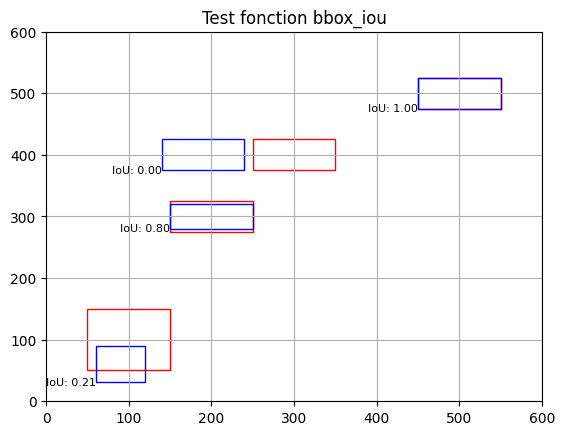

In [2]:
import torch
import matplotlib.patches as patches
from utils import bbox_iou


bboxes1 = torch.tensor(
    [
        [100, 100, 100, 100],
        [200, 300, 100, 50],
        [300, 400, 100, 50],
        [500, 500, 100, 50],
    ]
)  # Boîtes englobantes 1 (centre, largeur, hauteur)
bboxes2 = torch.tensor(
    [[90, 60, 60, 58], [200, 300, 100, 40], [190, 400, 100, 50], [500, 500, 100, 50]]
)  # Boîtes englobantes 2 (centre, largeur, hauteur)
iou_80 = bbox_iou(bboxes1, bboxes2)
print(iou_80)
# Affichage sur une même figure
fig, ax = plt.subplots(1)
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)
# Boîtes englobantes 1 (en rouge)
for i in range(bboxes1.shape[0]):
    rect1 = patches.Rectangle(
        (bboxes1[i, 0] - bboxes1[i, 2] / 2, bboxes1[i, 1] - bboxes1[i, 3] / 2),
        bboxes1[i, 2],
        bboxes1[i, 3],
        linewidth=1,
        edgecolor="r",
        facecolor="none",
    )
    ax.add_patch(rect1)
# Boîtes englobantes 2 (en bleu)
for i in range(bboxes2.shape[0]):
    rect2 = patches.Rectangle(
        (bboxes2[i, 0] - bboxes2[i, 2] / 2, bboxes2[i, 1] - bboxes2[i, 3] / 2),
        bboxes2[i, 2],
        bboxes2[i, 3],
        linewidth=1,
        edgecolor="b",
        facecolor="none",
    )
    ax.add_patch(rect2)
    # Affichage du IoU sur la figure
    plt.text(
        bboxes2[i, 0] - bboxes2[i, 2] / 2 - 30,
        bboxes2[i, 1] - bboxes2[i, 3] / 2,
        f"IoU: {iou_80[i]:.2f}",
        fontsize=8,
        verticalalignment="center",
        horizontalalignment="center",
        color="black",
    )
# Affichage du IoU sur la figure
plt.title("Test fonction bbox_iou")
plt.grid(True)
plt.show()

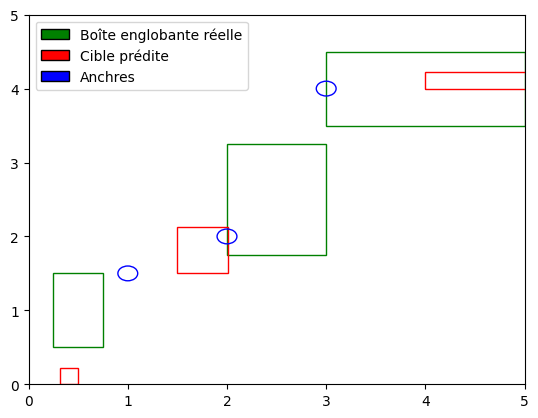

In [21]:
from utils import build_targets

# Exemple de données d'entrée
targets = torch.tensor(
    [[[1, 0.5, 0.5, 0.2, 0.3], [2, 0.8, 0.8, 0.4, 0.2], [0, 0.1, 0.2, 0.1, 0.2]]]
)
anchors = [(0.2, 0.3), (0.4, 0.4), (0.6, 0.8)]
grid_size = 5

# Création des cibles
mask, tx, ty, tw, th, tconf = build_targets(targets, anchors, grid_size)

# Affichage des résultats
fig, ax = plt.subplots(1)
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)

# Affichage des boîtes englobantes des objets
for target in targets[0]:
    rect = patches.Rectangle(
        (
            target[1] * grid_size - target[3] * grid_size / 2,
            target[2] * grid_size - target[4] * grid_size / 2,
        ),
        target[3] * grid_size,
        target[4] * grid_size,
        linewidth=1,
        edgecolor="g",
        facecolor="none",
    )
    ax.add_patch(rect)

# Affichage des cibles et des boîtes englobantes
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        for x in range(mask.shape[2]):
            for y in range(mask.shape[3]):
                if mask[i, j, x, y] == 1:
                    rect = patches.Rectangle(
                        (x - tx[i, j, x, y], y - ty[i, j, x, y]),
                        tw[i, j, x, y],
                        th[i, j, x, y],
                        linewidth=1,
                        edgecolor="r",
                        facecolor="none",
                    )
                    ax.add_patch(rect)

# Affichage des ancres
for anchor in anchors:
    anchor_circle = patches.Circle(
        (anchor[0] * grid_size, anchor[1] * grid_size),
        0.1,  # Rayon du cercle représentant l'ancre
        linewidth=1,
        edgecolor="b",
        facecolor="none",
    )
    ax.add_patch(anchor_circle)

# Ajout d'une légende
legend_elements = [
    patches.Patch(
        facecolor="green", edgecolor="black", label="Boîte englobante réelle"
    ),
    patches.Patch(facecolor="red", edgecolor="black", label="Cible prédite"),
    patches.Patch(facecolor="blue", edgecolor="black", label="Anchres"),
]
ax.legend(handles=legend_elements)
plt.show()